# Third Question: Memoryless exponential distribution

## Ali Borzoozadeh: 810102410

In [1]:
# Set the seed
set.seed(410)

### 1.

#### Function to generate exponential distribution samples:

In [2]:
generate_exponential_distribution <- function(rate, m)
{
    samples <- rexp(m, rate)
    return(samples)
}

### 2.

#### Function to calculate excess time:

In [3]:
calculate_excess_time <- function(samples)
{
    working_hours_limit <- 480
    excess_times <- c()
    
    for (time in samples)
    {
      
        if (time > working_hours_limit)
        {
            next
        }
    
        if (time > 12)
        {
            excess_time <- time - 12
            excess_times <- c(excess_times, excess_time)
        }
    }
    return(excess_times)
}

### 3.

#### Function to compute average and plot histogram for arrivals in all samples and arrivals after 12 minutes:

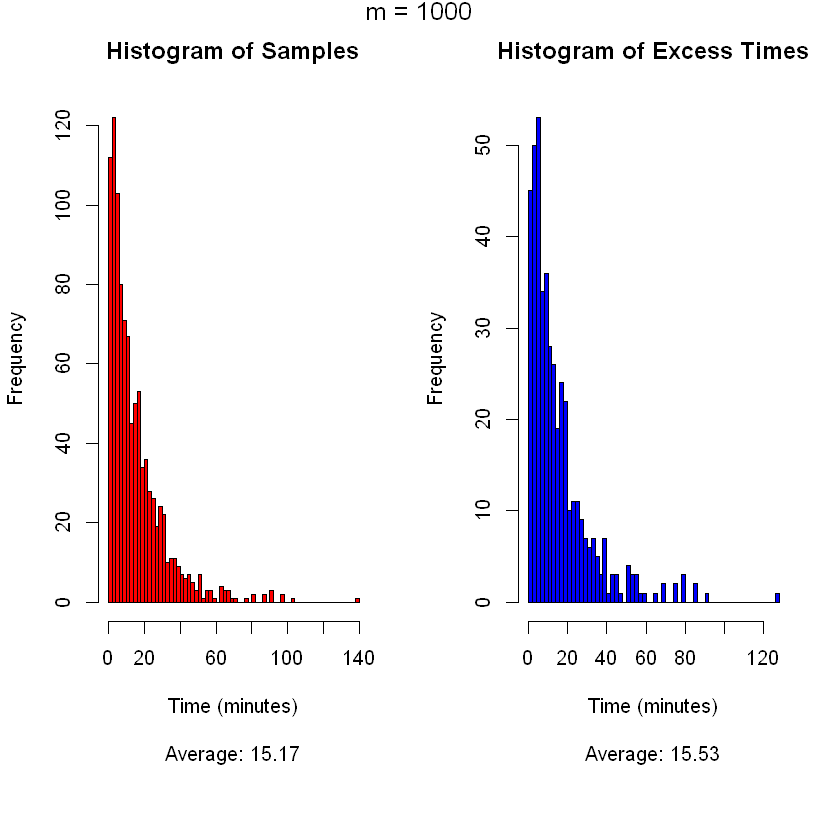

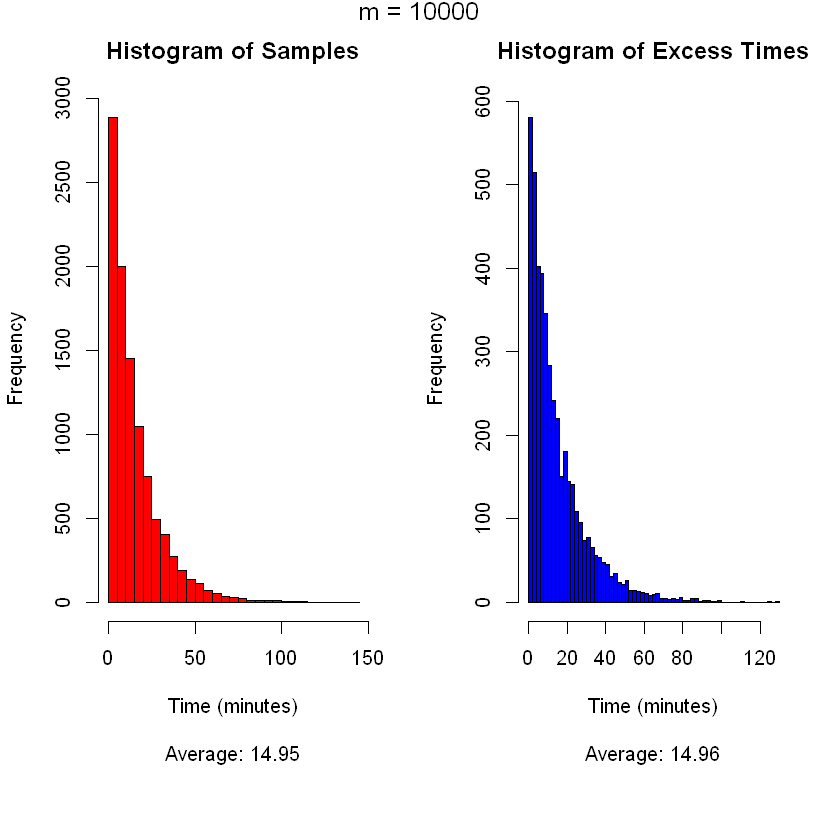

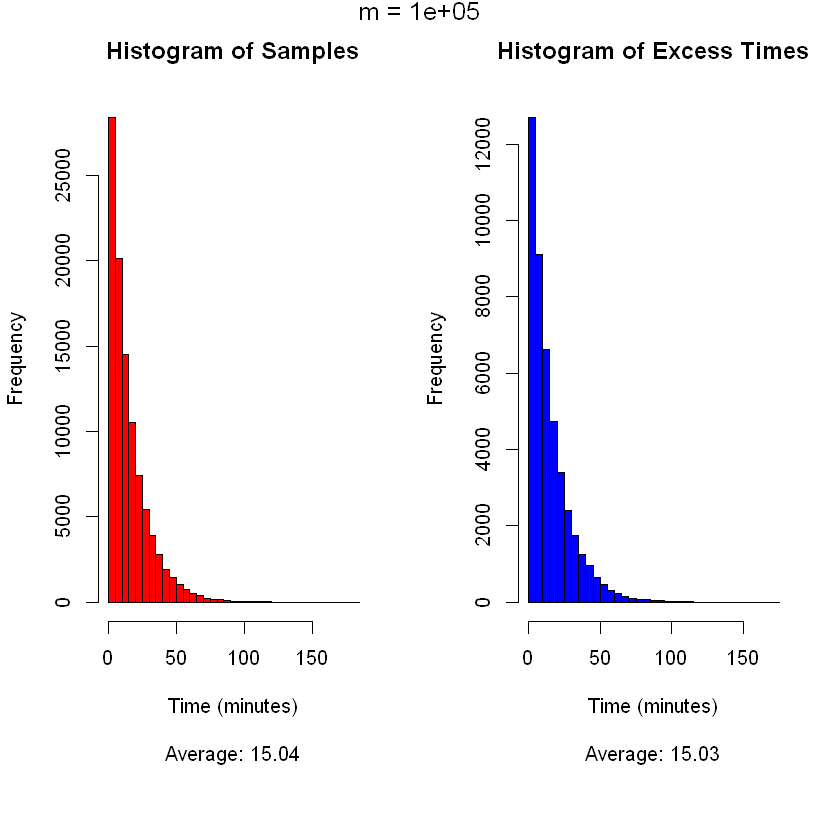

In [4]:
analyze_mean_hist <- function(rate, m)
{
    samples <- generate_exponential_distribution(rate, m)
    excess_times <- calculate_excess_time(samples)

    avg_sample <- mean(samples)
    avg_excess_time <- mean(excess_times)

    par(mfrow = c(1, 2), oma = c(4, 0, 0, 0))
    hist(samples, 
      main = "Histogram of Samples",
      xlab = "Time (minutes)",
      ylab = "Frequency",
      col = "red",
      breaks = 50)
    mtext(paste("Average:", round(avg_sample, 2)), side = 1, line = 5, cex = 1)
    
    hist(excess_times, 
      main = "Histogram of Excess Times",
      xlab = "Time (minutes)",
      ylab = "Frequency",
      col = "blue",
      breaks = 50)
    mtext(paste("Average:", round(avg_excess_time, 2)), side = 1, line = 5, cex = 1)
}

rate <- 1/15
sample_sizes <- c(1000, 10000, 100000)

for (m in sample_sizes)
{
    analyze_mean_hist(rate, m)
    par(mfrow = c(1, 2), oma = c(0, 0, 1, 0))
    mtext(paste("m =", m), outer = TRUE, cex = 1.25)
}

### 4.

As we can see, both graphs are similar and the averages are close to each other. The higher the value of m, the closer the values ​​of the two graphs become to each other.

### 5.

#### Practical probability calculation:

In [5]:
rate <- 1/15
m <- 1000

samples <- generate_exponential_distribution(rate, m)

calculate_probability <- function(samples)
{
    counter_12 <- 0
    counter_12_15 <- 0
    for (time in samples)
    {
        if (time > 12)
        {
            counter_12 <- counter_12 + 1
            if (time <= 15)
            {
                counter_12_15 <- counter_12_15 + 1
            }
        }
    }
    probability <- counter_12_15 / counter_12
    return (probability)
}

practical_probability = calculate_probability(samples)

practical_probability

[1] 0.1707317

#### Theoretical probability calculation:

In [6]:
rate <- 1/15
theoretical_probability <- 1 - exp(-rate * 3)

theoretical_probability

[1] 0.1812692

As we can see, the two practical and theoretical calculations are close to each other, and the memorylessness of the exponential distribution has been demonstrated.